In [4]:
import numpy as np
import matplotlib.pyplot as plt

from dflat.metasurface import load_trainer, load_optical_model
from dflat.plot_utilities import mp_format

## Train Nanocylinder Dataset

In [2]:
config_path = "metasurface/ckpt/Nanocylinders_TiO2_U180H600_Medium/config.yaml"
trainer = load_trainer(config_path)
trainer.train()

Loading trainer from config path: /home/deanhazineh/Research/Dflat-pytorch-private_version2/dflat/metasurface/ckpt/Nanocylinders_TiO2_U180H600_Medium/config.yaml
Target Module: dflat.metasurface.optical_model.NeuralCells
Target Module: dflat.metasurface.nn_siren.SirenNet
Loaded checkpoint from epoch 6250


Target Module: dflat.metasurface.optical_model.NeuralCells
Target Module: dflat.metasurface.nn_siren.SirenNet
Target: dflat.metasurface.optical_model.NeuralCells Loading from checkpoint /home/deanhazineh/Research/Dflat-pytorch-private_version2/dflat/metasurface/ckpt/Nanocylinders_TiO2_U180H600_Medium/model.ckpt as strict=True
Restored dflat.metasurface.optical_model.NeuralCells with 0 missing and 0 unexpected keys
torch.Size([1, 1, 100, 1, 200]) torch.Size([1, 1, 100, 1, 200])


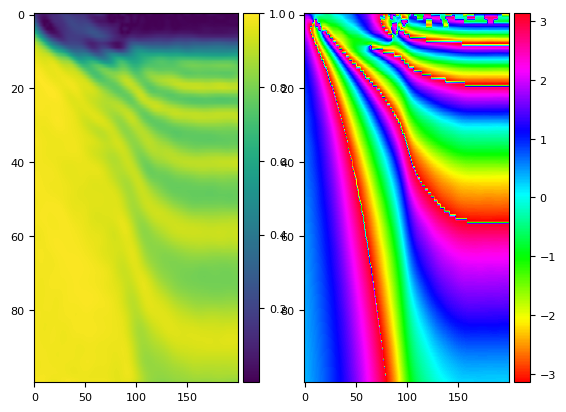

In [7]:
config_path = "metasurface/ckpt/Nanocylinders_TiO2_U180H600_Medium/config.yaml"
model = load_optical_model(config_path)

model = model.to("cuda")
lam = np.linspace(0, 1, 100)
lx = np.linspace(0, 1, 200)
p = lx[None, None, :, None]

amp, phase = model(p, lam, pre_normalized=True)
print(amp.shape, phase.shape)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(amp.squeeze().cpu().numpy())
mp_format.formatPlot(fig, ax[0], addcolorbar=True, setAspect="auto")
ax[1].imshow(phase.squeeze().cpu().numpy(), cmap="hsv", vmin=-np.pi, vmax=np.pi)
mp_format.formatPlot(fig, ax[1], addcolorbar=True, setAspect="auto")

plt.show()

# Train Nanofins

In [8]:
config_path = "metasurface/ckpt/Nanofins_TiO2_U350H600_Medium/config.yaml"
trainer = load_trainer(config_path)
trainer.train()

Loading trainer from config path: /home/deanhazineh/Research/Dflat-pytorch-private_version2/dflat/metasurface/ckpt/Nanofins_TiO2_U350H600_Medium/config.yaml
(1058841, 3) (1058841, 6)
0.0 1.0000000000000002 2.422173572824704e-12 1.010102207711479
Target Module: dflat.metasurface.optical_model.NeuralCells
Target Module: dflat.metasurface.nn_siren.SirenNet
Loaded checkpoint from epoch 2100


In [15]:
model = load_optical_model(config_path)
model.to('cuda')

lam = np.linspace(0, 1, 31)
lx = np.linspace(0, 1, 100)
lx, ly = np.meshgrid(lx, lx)
p = np.stack([lx.flatten(), ly.flatten()]).T
p = p[None, None]
print(p.shape)

amp, phase = model(p, lam, pre_normalized=True)

amp = amp.squeeze()
phase = phase.squeeze()
amp = amp.view(2, len(lam), len(lx), len(lx)).cpu().numpy()
phase = phase.view(2, len(lam), len(lx), len(lx)).cpu().numpy()

fig, ax = plt.subplots(2, 2)
for i in range(2):
    ax[i, 0].imshow(amp[0, len(lam)//2, :, :])
    ax[i, 1].imshow(phase[16, :, :, i])
plt.show()


Target Module: dflat.metasurface.optical_model.NeuralCells
Target Module: dflat.metasurface.nn_siren.SirenNet
Target: dflat.metasurface.optical_model.NeuralCells Loading from checkpoint /home/deanhazineh/Research/Dflat-pytorch-private_version2/dflat/metasurface/ckpt/Nanofins_TiO2_U350H600_Medium/model.ckpt as strict=True
Restored dflat.metasurface.optical_model.NeuralCells with 0 missing and 0 unexpected keys
(1, 1, 10000, 2)
(2, 31, 100, 100) (2, 31, 100, 100)
